<a href="https://colab.research.google.com/github/jmutadeo/aprendizajeatm/blob/master/Ejercicio_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion Linear


## Ejercicio (Ficiticio)

Se tiene una serie de mediciones ($x$) de un conductímetro sobre un fluido y las mediciones ($y$) del mismo fluido que al ser analizadas por un espectrómetro de masas en un laboratorio genera la concentración de un elemento químico que determina la calidad del agua. Realizar un algoritmo un programa de ML capaz de estimar la concentración del elemento químico en nuevas muestras.

Utilizar [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)





###  Descriptive Data analysis

- may be clean the data?

,Unnamed: 0,X,y
count,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.005000,30.852884
std,1154.844867,11.548449,32.525128
min,0.000000,-20.000000,-150.000000
25%,999.750000,-10.002500,11.520831
50%,1999.500000,-0.005000,31.300053
75%,2999.250000,9.992500,52.339514
max,3999.000000,19.990000,128.782166


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


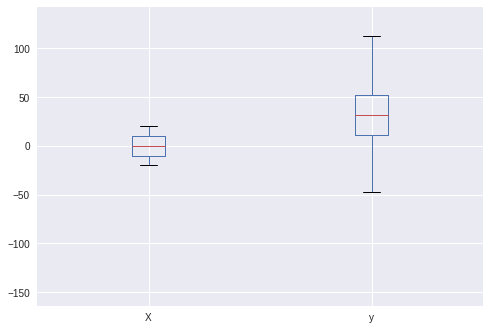

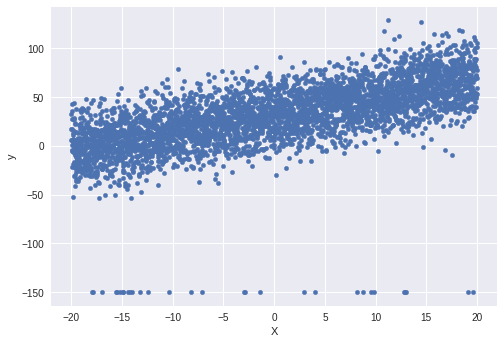

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML



# Analisis preliminar de datos

df=pd.read_csv('laboratorio_aguas.csv')

display(HTML(df.describe().to_html()))
df[['X','y']].plot.box()
df.plot.scatter(x='X',y='y')

#plt.savefig('scatter.pdf',format='pdf')


### Split training and text data

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

Divide los datos en dos bancos y se escogen para prueba y entrenamiento

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# split training and text data
X=df.as_matrix(['X'])
y=df.as_matrix(['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4200)

### Train the model

Train the model consist in  make  the optimization to obtain the long memory paramters of the model.

In [0]:
# Create linear regression object
regr = linear_model.LinearRegression()
#testing other linear alorithms
# regr=linear_model.Ridge(alpha=.1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients: 
 [[1.84952696]]
Intercept:  [30.99856303]


### Test the Model

Can we generalize our model to work good with other data?

regressor score                |      0.41
Mean squared error             |    533.05
mean_squared_error             |    533.05
mean_absolute_error            |     16.05
median_absolute_error          |     12.52
explained_variance_score       |      0.41
r ^ 2 score                    |      0.41


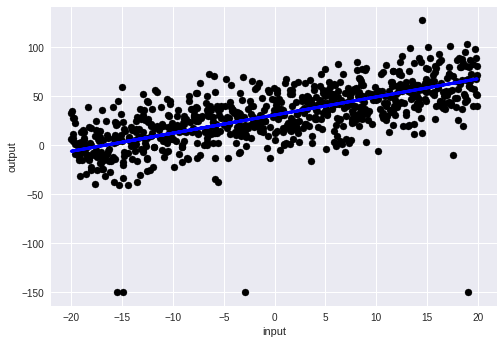

In [0]:
from sklearn.metrics import accuracy_score,median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score


def test_model(X_test,y_test,regr):
  #prediction
  y_pred=regr.predict(X_test)
  ##graficas

  plt.scatter(X_test, y_test,  color='black')
  plt.plot(X_test, y_pred, color='blue',linewidth=3)
  plt.xlabel('input')
  plt.ylabel('output')


  # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
  print('{0:30} | {1:9.2f}'.format('regressor score', regr.score(X_test,y_test)))
  print('{0:30} | {1:9.2f}'.format('Mean squared error', np.mean((y_pred - y_test) ** 2)))
  print('{0:30} | {1:9.2f}'.format('mean_squared_error', mean_squared_error(y_test,y_pred)))
  #print('{0:30} | {1:9.2f}'.format('mean_squared_log_error', mean_squared_log_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('mean_absolute_error', mean_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('median_absolute_error', median_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('explained_variance_score', explained_variance_score(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('r ^ 2 score', r2_score(y_test,y_pred)))

  
test_model(X_test,y_test,regr)

### Make the program 


In [0]:
def conversor(x):
  return regr.predict(x)


**Version 2** Using [persistence](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#model-persistence).

Other way to generate persistence is to send the parameters of the models ``regr.coef_`` and ``regr.intercept_``, but some models has many parameters.

In [0]:
#saving the model (just one time after training)
import pickle #for save the model

name_file='lineardiabetes.pkl'
myfile = open(name_file, 'wb')
pickle.dump(regr,myfile)
myfile.close()


In [0]:

import pickle #for save the model
def conversor(x,model_file):
  # load the model with the trained model 
  ## example, this function can be a web server in django 
  new_file = open(model_file, 'rb')
  clf2 = pickle.load(new_file)
  return clf2.predict(x)


# after this point a lot of data engineering would be required...

## Is the better solution to use a linear regressor?

When evaluating different settings (“hyperparameters”) for estimators or differents stimators, there exits the risk of overfitting on the test set because the selection of the model can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). 


**Exercise**

Cambiar el metodo de scoring y usar diferents tipos de regresores.


In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


regressors = [linear_model.LinearRegression(),linear_model.Ridge(alpha=.7),MLPRegressor(hidden_layer_sizes=(22,100,),activation='relu',max_iter=100000),linear_model.RANSACRegressor(random_state=0)]
names = ['lineal','ridge 0.7','MLP','RANSAC']
#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['explained_variance',
          'neg_mean_absolute_error',
          'neg_mean_squared_error',
          'neg_mean_squared_log_error',
          'neg_median_absolute_error',
          'r2']



for reg,name in zip(regressors,names):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=scoring[5],
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,scoring[5]))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy(95.7%): {0:23.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))
    


--------------------------------------
model lineal               | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model ridge 0.7            | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model MLP                  | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model RANSAC               | score r2                  
mean                   0.39| std   0.07                  
Accuracy(95.7%):                    0.39 (+/- 0.14)


In [0]:
    
#after this point repeat test and implementation process whith the best model.
model=regressors[2].fit(X_train,y_train.ravel())
test_model(X_test,y_test,model)

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include gamma for Ridge, alpha for Lasso, etc.  It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

estimator.get_params()

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) exhaustively considers all parameter combinations, while [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) can sample a given number of candidates from a parameter space with a specified distribution.

[More information](https://scikit-learn.org/stable/modules/grid_search.html)

## Problema diabetes


### Information about data
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
age sex bmi map tc ldl hdl tch ltg glu y
Samples total	442
Dimensionality	10
Features	real,     -.2 < x < .2
Targets	integer     25 - 346

The dataset in scikit-learn is standarized. It have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1)


### Ejercicio

Utilizando [diabetes.data](http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html):
- Realizar una regresión con respecto a BMI  
- Realizar una regresión con respecto a cada uno de los factores
- Realizar una regresión con respecto a  dos variables y a todas
- ¿cuales serian las mejores variables de entrada para hacer la regresión y porque?
- ¿Que puede concluir sobre la regresión?
- ¿que técnicas de visualización o muestra de resultados aplicaría?

Posibles factores para evaluar la eficiencia de la regresion:

- [coeficiente de determinación](https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n).  en scikit usar [score](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score)
- La media de la norma cuadratica del error.
- Aplicar [cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html)


Posibles graficas a utilizar:
- entrada vs salida
- muestra vs salida
- histograma del error de estimación


[ejemplo usando información normalizada](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)



In [5]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

import pandas
import numpy as np
from IPython.display import display, HTML
from sklearn import datasets, linear_model

# Load the diabetes dataset
#diabetes = datasets.load_diabetes()
#diabetes['feature_names'].append('Y')
#data=pandas.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'])
#descripcion=data.describe()
#print(descripcion)



data = pandas.read_csv('diabetes.data',sep='\t')
descripcion=data.describe()
print(descripcion)
display(HTML(data.describe().to_html()))



Automatically created module for IPython interactive environment
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
s

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


### Realizar una regresión con respecto a BMI 


MODELO PARA BMI
Coeficiente  [10.65228664]
Intercepto  -128.49952726832097
Mean squared error: 4129.23
r^2: 0.29
r^2 k-fold=5:  [0.28593451 0.2031138  0.32850627 0.16546242 0.53293908]
r^2 mejor estimado: 0.53


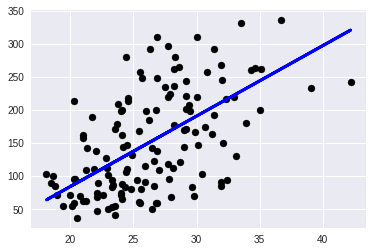

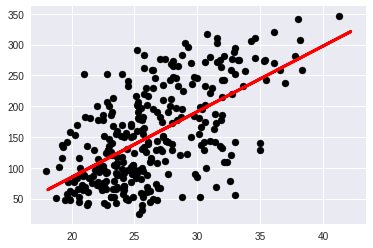

0.5329390847873219

In [105]:
'''
BMI
'''
%matplotlib inline
import pickle #for save the model
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.cross_validation import train_test_split
# de acuerdo a la version scikit train_test_split puede ser
from sklearn.model_selection import train_test_split ,cross_val_score

#Se definen la variable x y el target Y
diabetes_X = data.as_matrix(['BMI'])
diabetes_Y =data['Y']


def proceso(dtX ,dtY ,testSize=0.30 ,grafica=True):
    # Partir los datos entre datos de entrenamiento y prueba 
    x_train ,x_test ,y_train ,y_test = train_test_split(dtX ,dtY ,test_size=testSize ,random_state=5000)

    # ENTRENAMIENTO DEL MODELO
    ## Crear modelo de regresion lineal
    mreg = linear_model.LinearRegression()

    ## Entrenar el modelo
    mreg.fit(x_train ,y_train)


    ## Evaluar resultado de entrenamiento del modelo
    coef = mreg.coef_
    inter = mreg.intercept_
    print ('Coeficiente ',coef)
    print ('Intercepto ',inter)

    y_pred = mreg.predict(x_test)

    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("r^2: %.2f" % r2_score(y_test,y_pred))

    scoring =['neg_mean_squared_error','r2']
    scores = cross_val_score (mreg, x_train, y_train, scoring=scoring[1],cv=5)
    print ("r^2 k-fold=5: ", scores)
    maxr2 = scores.max()
    print ("r^2 mejor estimado: %.2f" % maxr2)   
    
    if grafica==True: 
        plt.scatter(x_test, y_test,  color='black')
        plt.plot(x_test, y_pred, color='blue', linewidth=3)
        plt.show()

        plt.scatter(x_train, y_train,  color='black')
        plt.plot(x_test, y_pred, color='red', linewidth=3)
        plt.show()

    return maxr2

print('\nMODELO PARA BMI')
proceso(diabetes_X ,diabetes_Y ,0.30)


### Realizar una regresión con respecto a cada uno de los factores

Feature:  AGE
Coeficiente  [0.98109261]
Intercepto  104.98829775472112
Mean squared error: 5552.49
r^2: 0.05
r^2 k-fold=5:  [ 0.03208735 -0.25573931  0.02145776 -0.15619008  0.00885648]
r^2 mejor estimado: 0.03


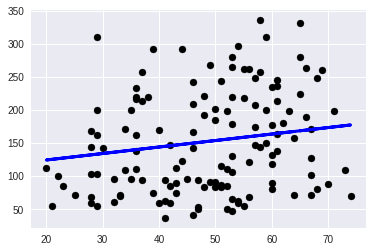

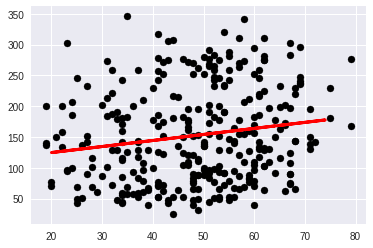

Feature:  SEX
Coeficiente  [2.34635328]
Intercepto  149.1969993199592
Mean squared error: 5832.58
r^2: 0.00
r^2 k-fold=5:  [-0.05134238 -0.29034831 -0.04835419 -0.18082305 -0.02045795]
r^2 mejor estimado: -0.02


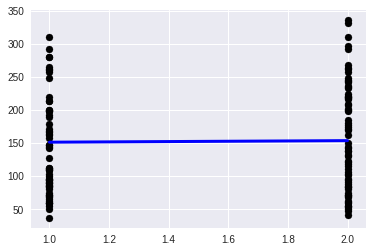

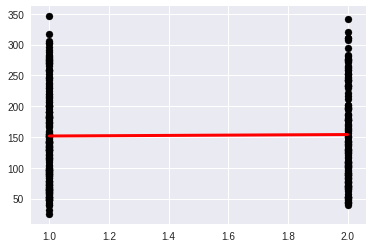

Feature:  BMI
Coeficiente  [10.65228664]
Intercepto  -128.49952726832097
Mean squared error: 4129.23
r^2: 0.29
r^2 k-fold=5:  [0.28593451 0.2031138  0.32850627 0.16546242 0.53293908]
r^2 mejor estimado: 0.53


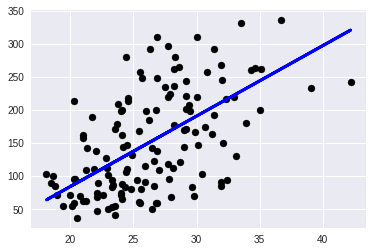

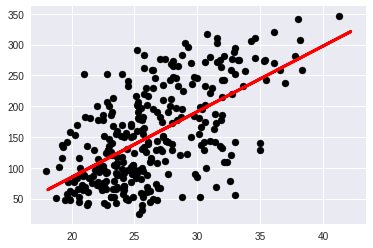

Feature:  BP
Coeficiente  [2.3029269]
Intercepto  -65.79455692819477
Mean squared error: 4416.09
r^2: 0.24
r^2 k-fold=5:  [ 0.28492121 -0.14132982  0.27184647 -0.12397285  0.11881206]
r^2 mejor estimado: 0.28


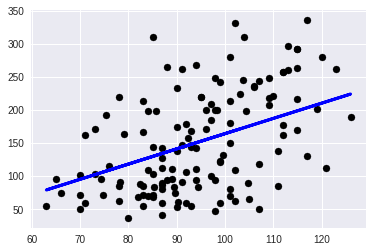

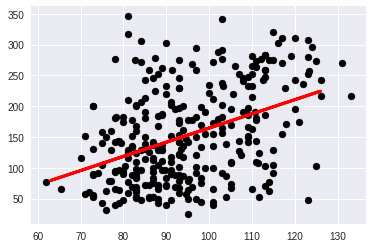

Feature:  S1
Coeficiente  [0.44959343]
Intercepto  67.59416413853548
Mean squared error: 5518.18
r^2: 0.06
r^2 k-fold=5:  [-0.02133543 -0.27299872  0.05011496 -0.08669662  0.01932497]
r^2 mejor estimado: 0.05


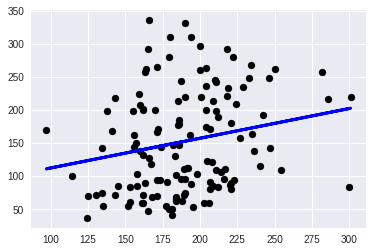

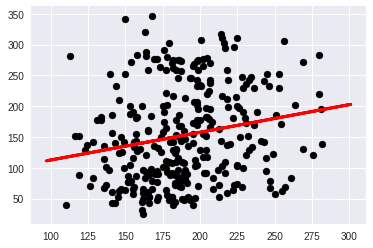

Feature:  S2
Coeficiente  [0.42710111]
Intercepto  103.6338586526535
Mean squared error: 5641.47
r^2: 0.04
r^2 k-fold=5:  [-0.05987844 -0.29635733  0.03717695 -0.11005868  0.02828263]
r^2 mejor estimado: 0.04


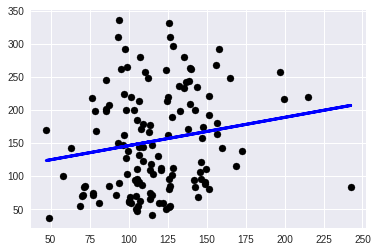

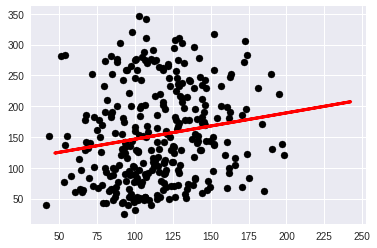

Feature:  S3
Coeficiente  [-2.30666683]
Intercepto  268.67081740555
Mean squared error: 5006.88
r^2: 0.14
r^2 k-fold=5:  [ 0.18312675 -0.05202636 -0.03510408 -0.02218269  0.25004074]
r^2 mejor estimado: 0.25


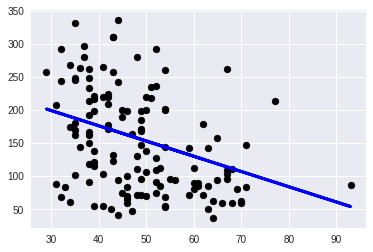

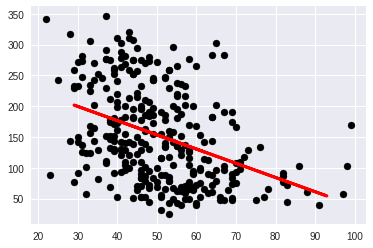

Feature:  S4
Coeficiente  [25.93279781]
Intercepto  48.04925237453571
Mean squared error: 4748.81
r^2: 0.19
r^2 k-fold=5:  [ 0.1249634  -0.0271601   0.09162777  0.04819221  0.28341575]
r^2 mejor estimado: 0.28


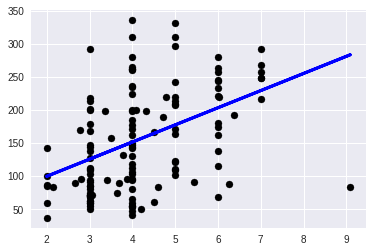

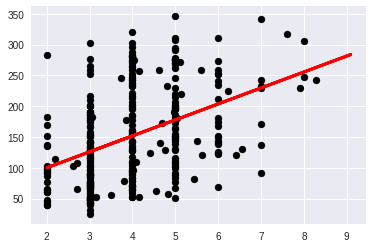

Feature:  S5
Coeficiente  [83.53723023]
Intercepto  -236.08339905868806
Mean squared error: 3909.98
r^2: 0.33
r^2 k-fold=5:  [0.37609704 0.12172961 0.15955406 0.2715187  0.27955018]
r^2 mejor estimado: 0.38


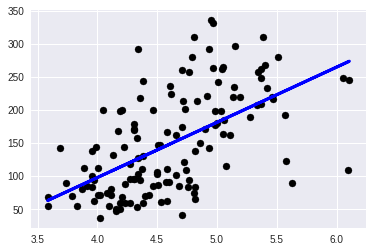

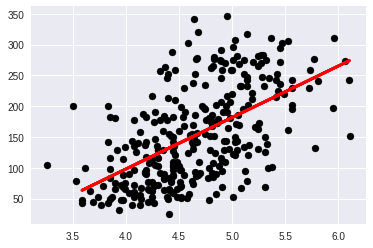

Feature:  S6
Coeficiente  [2.16812486]
Intercepto  -44.28828212347514
Mean squared error: 4432.44
r^2: 0.24
r^2 k-fold=5:  [ 0.08575452 -0.19257778  0.01603986 -0.03242514  0.14558761]
r^2 mejor estimado: 0.15


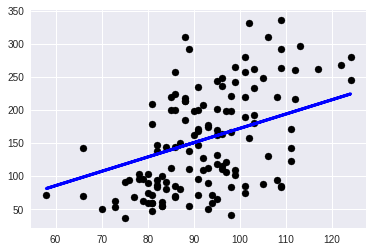

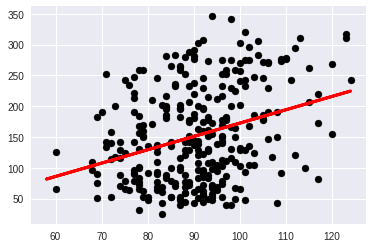

In [102]:
#plt.figure(figsize=(20,10))
d = {}
for factor in data.keys():
  if factor != 'Y':
    diabetes_X = data.as_matrix([factor])
    diabetes_Y = data['Y']
    print('Feature: ',factor)
    res = proceso(diabetes_X ,diabetes_Y)
    d[factor] = res

   

###  Realizar una regresión con respecto a  dos variables y a todas 

CON DOS VARIABLES
Coeficiente  [0.83456965 9.90521318]
Intercepto  -184.56532626249057
Mean squared error: 3818.63
r^2: 0.35
r^2 k-fold=5:  [0.28321432 0.21387755 0.34762011 0.18404985 0.55262632]
r^2 mejor estimado: 0.55


CON TODAS LAS VARIABLES
Coeficiente  [ -0.06917783 -20.29616864   6.14691638   0.96204357  -0.71303492
   0.50613796  -0.09162028   2.83108108  59.15528292   0.16769582]
Intercepto  -288.72836564258057
Mean squared error: 2703.54
r^2: 0.54
r^2 k-fold=5:  [0.4431796  0.37603729 0.43727752 0.34447832 0.5495952 ]
r^2 mejor estimado: 0.55


CON THE BEST VARIABLES
Coeficiente  [ 6.43625351  0.81598413 47.51604877 -4.69992431 -1.00672282]
Intercepto  -246.1686488773976
Mean squared error: 2833.50
r^2: 0.49
r^2 k-fold=5:  [0.44397388 0.51477424 0.35043638 0.40850657 0.52676912]
r^2 mejor estimado: 0.53


GRAFICO DE R2 POR ATIRBUTO VALIDADO


<BarContainer object of 10 artists>

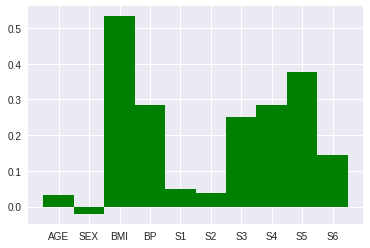

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.spatial


print('CON DOS VARIABLES')
diabetes_X = data.as_matrix(['S6','BMI'])
diabetes_Y = data['Y']
proceso(diabetes_X ,diabetes_Y, 0.30, False)
print('\n')
print('CON TODAS LAS VARIABLES')
diabetes_X = data.as_matrix(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'])
proceso(diabetes_X ,diabetes_Y, 0.30, False)
print('\n')
print('CON LAS VARIABLES MAS REPRESENTATIVAS')
diabetes_X = data.as_matrix(['BMI', 'BP', 'S5', 'S4', 'S3'])
proceso(diabetes_X ,diabetes_Y, 0.20, False)

print('\n')
print('GRAFICO DE R2 POR ATRIBUTO VALIDADO')
width = 1.0
plt.bar(d.keys(), d.values(), width, color='g')

### presente sus conclusiones del ejercicio

**- ¿cuales serian las mejores variables de entrada para hacer la regresión y porque?**


*Teniendo en cuenta los resultados de la regresion lineal implementada, las variables que tienen mayor incidencia en el modelo son BMI, S5, S4, BP y S3 cuya estimación de R^2 superan el 25%. La integracion en conjunto de estas variables en un nuevo modelo de regresion lineal implementado lleva a una medida de R^2 de 0.53 la cual solo es superada al unir todas las variables en el modelo *R^2 = 0.55.

Asi mismo existen variables que no aportan al modelo por su baja o casi nula representacion tales como SEXO, EDAD, S2 y S1*

**- ¿Que puede concluir sobre la regresión?**
*Aun teniendo en cuenta todas las variables utilizadas en el modelo, este sigue siendo poco confiable ya que la estimacion del R^2 esta cercano solo al 50%, no se aprecia una correlacion marcada entre los atributos y la variable de resultados.*

**- ¿que técnicas de visualización o muestra de resultados aplicaría?**

*Se utilizaron graficos de dispersion para conocer el comportamiento entre la variable de estudio y los resultados del modelo de regresion lineal y se utiliza un diagrama de barras para graficar el mejor estimado del R^2 de los modelos ejecutados para cada atributo*